In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate


In [2]:
df = pd.read_csv('Balanced.csv')

In [3]:
df

,Serial,Year,Sex,Origin,Age,Height,Weight,CigUnit,AlcoholUnit,Insulin,IFCCA1,OmDiast,OmSyst,HDLChol,Cholest,BMI,Diabetes
0,10105101,2005,2,1,5,150.200000,59.100000,20.000000,0.000000,2.000000,56.74,72.860000,126.750000,1.5,0.000000,26.200000,2
1,10108101,2005,2,1,2,154.300000,52.100000,0.000000,0.000000,2.000000,56.74,72.860000,126.750000,1.5,0.000000,21.880000,2
2,10111101,2005,1,1,6,165.700000,78.100000,0.000000,0.000000,2.000000,56.74,84.500000,176.500000,1.5,4.300000,28.450000,2
3,10111102,2005,2,1,5,162.300000,77.800000,20.000000,0.000000,2.000000,56.74,82.000000,150.000000,1.5,0.000000,29.540000,2
4,10117101,2005,2,1,2,151.200000,69.200000,20.000000,0.000000,2.000000,56.74,72.860000,126.750000,1.5,0.000000,30.270000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128377,115012371,2009,1,1,5,167.506261,94.604598,0.000000,1.243213,2.000000,56.74,77.734349,157.288642,1.5,4.685596,33.781673,1
128378,172428101,2010,1,8,5,157.514299,74.035076,0.000000,0.376624,1.623376,56.74,72.860000,126.750000,1.5,0.000000,29.712857,1
128379,2520334,2015,1,1,4,164.905398,84.342416,0.000000,4.426736,2.000000,56.74,74.213316,130.702442,1.5,2.845759,31.063625,1
128380,115318920,2013,2,1,6,153.245858,72.173623,0.000000,0.218092,2.000000,56.74,71.363887,125.168831,1.5,0.000000,30.465840,1


In [4]:
X = df[['Sex','IFCCA1', 'OmDiast', 'OmSyst', 'HDLChol', 'Cholest', 'BMI']]
y = df['Diabetes']

X = pd.get_dummies(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [6]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracyRF = accuracy_score(y_test, y_pred)
mccRF = matthews_corrcoef(y_test, y_pred)
roc_aucRF = roc_auc_score(y_test, y_pred)
precisionRF = precision_score(y_test, y_pred)
recallRF = recall_score(y_test, y_pred)
f1RF = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracyRF)
print("Matthews Correlation Coefficient (MCC):", mccRF)
print("ROC-AUC Score:", roc_aucRF)
print("Precision:", precisionRF)
print("Recall:", recallRF)
print("F1 Score:", f1RF)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8677716849451645
Matthews Correlation Coefficient (MCC): 0.7364824053425981
ROC-AUC Score: 0.8677034256964079
Precision: 0.8874176548089592
Recall: 0.8416218917905786
F1 Score: 0.8639132944269865

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.84      0.86     16006
           2       0.85      0.89      0.87     16090

    accuracy                           0.87     32096
   macro avg       0.87      0.87      0.87     32096
weighted avg       0.87      0.87      0.87     32096



In [7]:
# Initialize MLPClassifier (Neural Network)
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute predictions probabilities for ROC-AUC score
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute evaluation metrics
accuracyNL = accuracy_score(y_test, y_pred)
mccNL = matthews_corrcoef(y_test, y_pred)
roc_aucNL = roc_auc_score(y_test, y_pred)
precisionNL = precision_score(y_test, y_pred)
recallNL = recall_score(y_test, y_pred)
f1NL = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracyNL)
print("Matthews Correlation Coefficient (MCC):", mccNL)
print("ROC-AUC Score:", roc_aucNL)
print("Precision:", precisionNL)
print("Recall:", recallNL)
print("F1 Score:", f1NL)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7867335493519442
Matthews Correlation Coefficient (MCC): 0.5789940670457906
ROC-AUC Score: 0.7869100943889361
Precision: 0.7518280279289681
Recall: 0.8543671123328752
F1 Score: 0.7998245357508408

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.85      0.80     16006
           2       0.83      0.72      0.77     16090

    accuracy                           0.79     32096
   macro avg       0.79      0.79      0.79     32096
weighted avg       0.79      0.79      0.79     32096



In [8]:
clf = SVC(kernel='rbf', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute evaluation metrics
accuracySVC = accuracy_score(y_test, y_pred)
mccSVC = matthews_corrcoef(y_test, y_pred)
roc_aucSVC = roc_auc_score(y_test, y_pred)
precisionSVC = precision_score(y_test, y_pred)
recallSVC = recall_score(y_test, y_pred)
f1SVC = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracySVC)
print("Matthews Correlation Coefficient (MCC):", mccSVC)
print("ROC-AUC Score:", roc_aucSVC)
print("Precision:", precisionSVC)
print("Recall:", recallSVC)
print("F1 Score:", f1SVC)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.729904037886341
Matthews Correlation Coefficient (MCC): 0.4623346945563568
ROC-AUC Score: 0.7300350194966507
Precision: 0.7080238162744542
Recall: 0.7800824690740972
F1 Score: 0.7423084926131803

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.78      0.74     16006
           2       0.76      0.68      0.72     16090

    accuracy                           0.73     32096
   macro avg       0.73      0.73      0.73     32096
weighted avg       0.73      0.73      0.73     32096



In [9]:
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute evaluation metrics
accuracyDT = accuracy_score(y_test, y_pred)
mccDT = matthews_corrcoef(y_test, y_pred)
roc_aucDT = roc_auc_score(y_test, y_pred)
precisionDT = precision_score(y_test, y_pred)
recallDT = recall_score(y_test, y_pred)
f1DT = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracyDT)
print("Matthews Correlation Coefficient (MCC):", mccDT)
print("ROC-AUC Score:", roc_aucDT)
print("Precision:", precisionDT)
print("Recall:", recallDT)
print("F1 Score:", f1DT)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8608860917248256
Matthews Correlation Coefficient (MCC): 0.7223212643576629
ROC-AUC Score: 0.860832707467453
Precision: 0.8756102323764889
Recall: 0.840434836936149
F1 Score: 0.8576620230163537

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.84      0.86     16006
           2       0.85      0.88      0.86     16090

    accuracy                           0.86     32096
   macro avg       0.86      0.86      0.86     32096
weighted avg       0.86      0.86      0.86     32096



In [10]:
logistic_clf = LogisticRegression(random_state=42)

# Train the model
logistic_clf.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_clf.predict(X_test)

# Compute evaluation metrics
accuracyLR = accuracy_score(y_test, y_pred)
mccLR = matthews_corrcoef(y_test, y_pred)
roc_aucLR = roc_auc_score(y_test, y_pred)
precisionLR = precision_score(y_test, y_pred)
recallLR = recall_score(y_test, y_pred)
f1LR = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracyLR)
print("Matthews Correlation Coefficient (MCC):", mccLR)
print("ROC-AUC Score:", roc_aucLR)
print("Precision:", precisionLR)
print("Recall:", recallLR)
print("F1 Score:", f1LR)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))


Accuracy: 0.8608860917248256
Matthews Correlation Coefficient (MCC): 0.7223212643576629
ROC-AUC Score: 0.860832707467453
Precision: 0.8756102323764889
Recall: 0.840434836936149
F1 Score: 0.8576620230163537

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.75      0.73     16006
           2       0.74      0.70      0.72     16090

    accuracy                           0.73     32096
   macro avg       0.73      0.73      0.73     32096
weighted avg       0.73      0.73      0.73     32096



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# Initialize GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_clf.predict(X_test)

# Compute evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred)
mcc_gb = matthews_corrcoef(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# Print evaluation metrics
print("Accuracy:", accuracy_gb)
print("Matthews Correlation Coefficient (MCC):", mcc_gb)
print("ROC-AUC Score:", roc_auc_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


Accuracy: 0.8608860917248256
Matthews Correlation Coefficient (MCC): 0.6643503873759131
ROC-AUC Score: 0.8316523822211791
Precision: 0.8500693206575559
Recall: 0.8044483318755467
F1 Score: 0.8266298590825923

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.80      0.83     16006
           2       0.82      0.86      0.84     16090

    accuracy                           0.83     32096
   macro avg       0.83      0.83      0.83     32096
weighted avg       0.83      0.83      0.83     32096



In [12]:


# Initialize KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Train the model
knn_clf.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_clf.predict(X_test)

# Compute evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred)
mcc_knn = matthews_corrcoef(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print evaluation metrics
print("Matthews Correlation Coefficient (MCC):", mcc_knn)
print("ROC-AUC Score:", roc_auc_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Matthews Correlation Coefficient (MCC): 0.5940444983182477
ROC-AUC Score: 0.7970013381402111
Precision: 0.7993439727496373
Recall: 0.79170311133325
F1 Score: 0.7955051947644308

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.79      0.80     16006
           2       0.79      0.80      0.80     16090

    accuracy                           0.80     32096
   macro avg       0.80      0.80      0.80     32096
weighted avg       0.80      0.80      0.80     32096



In [16]:

# Define data
data = [
    ['KNN', accuracy_knn, mcc_knn, f1_knn],
    ['SVC', accuracySVC, mccSVC, f1SVC],
    ['Neural Network', accuracyNL, mccNL, f1NL],
    ['Decision Tree', accuracyDT, mccDT, f1DT],
    ['Gradient Boosting', accuracy_gb, mcc_gb, f1_gb],
    ['Logistic Regression', accuracyLR, mccLR, f1LR],
    ['Random Forest', accuracyRF, mccRF, f1RF]
]

# Create table
table = tabulate(data, headers=['Model', 'Accuracy', 'MCC', 'F1 Score'], tablefmt='pretty')

# Print table
print(table)

+---------------------+--------------------+--------------------+--------------------+
|        Model        |      Accuracy      |        MCC         |      F1 Score      |
+---------------------+--------------------+--------------------+--------------------+
|         KNN         | 0.8608860917248256 | 0.5940444983182477 | 0.7955051947644308 |
|         SVC         | 0.729904037886341  | 0.4623346945563568 | 0.7423084926131803 |
|   Neural Network    | 0.7867335493519442 | 0.5789940670457906 | 0.7998245357508408 |
|    Decision Tree    | 0.8608860917248256 | 0.7223212643576629 | 0.8576620230163537 |
|  Gradient Boosting  | 0.8608860917248256 | 0.6643503873759131 | 0.8266298590825923 |
| Logistic Regression | 0.8608860917248256 | 0.7223212643576629 | 0.8576620230163537 |
|    Random Forest    | 0.8677716849451645 | 0.7364824053425981 | 0.8639132944269865 |
+---------------------+--------------------+--------------------+--------------------+


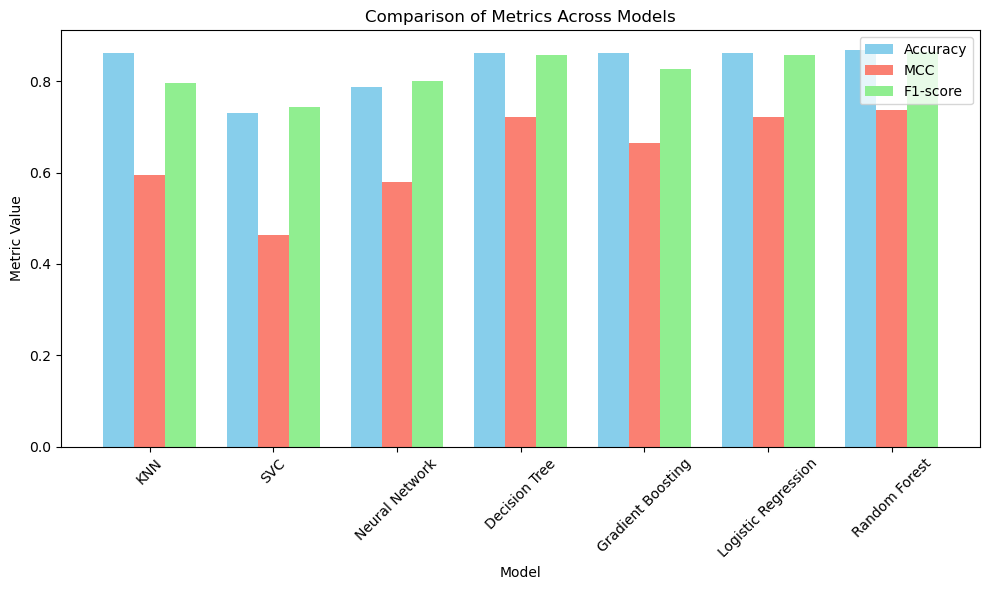

In [17]:
models = ['KNN', 'SVC', 'Neural Network', 'Decision Tree', 'Gradient Boosting', 'Logistic Regression',
                      'Random Forest']
# Define metrics
accuracy = [accuracy_knn, accuracySVC, accuracyNL, accuracyDT, accuracy_gb, accuracyLR, accuracyRF]
mcc = [mcc_knn, mccSVC, mccNL, mccDT, mcc_gb, mccLR, mccRF]
f1_score = [f1_knn, f1SVC, f1NL, f1DT, f1_gb, f1LR, f1RF]

x = np.arange(len(models))

# Define bar width
bar_width = 0.25

# Plotting
plt.figure(figsize=(10, 6))

# Plotting accuracy
plt.bar(x - bar_width, accuracy, width=bar_width, color='skyblue', label='Accuracy')

# Plotting MCC
plt.bar(x, mcc, width=bar_width, color='salmon', label='MCC')

# Plotting F1-score
plt.bar(x + bar_width, f1_score, width=bar_width, color='lightgreen', label='F1-score')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('Comparison of Metrics Across Models')
plt.xticks(x, models, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()